# Ejercicios sobre notas de parcial

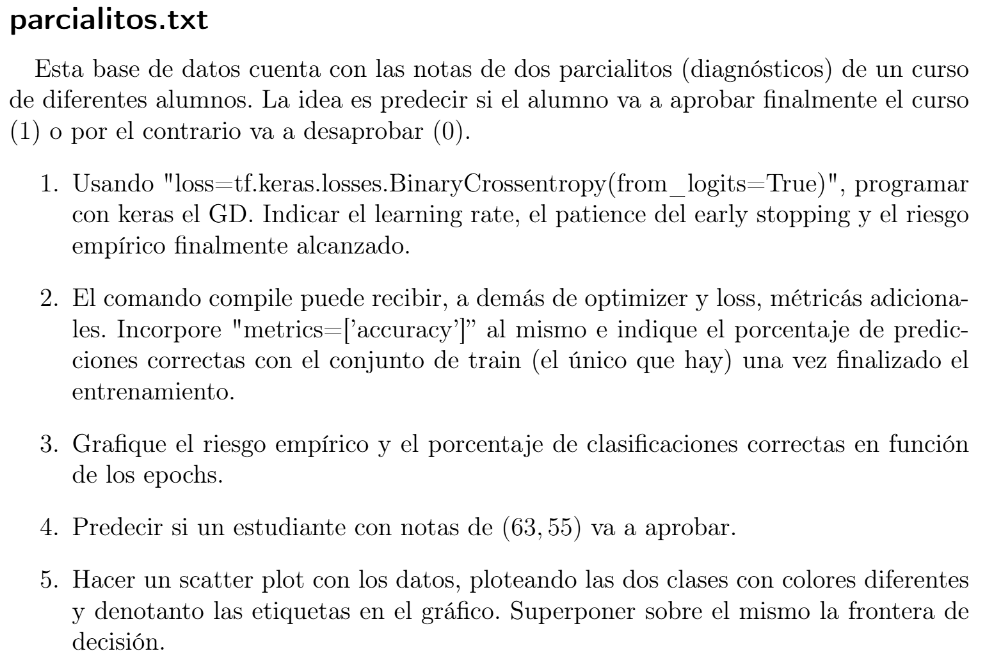

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from urllib import request

Obtengo datos del repositorio de *github*

In [ ]:
example_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt"
f = request.urlopen(example_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",")

Separo los datos

In [ ]:
notas = np.array(dataset[:,:2])
resultados = np.array(dataset[:,2])
mu = np.mean(notas, axis=0)
sigma = np.std(notas, axis=0)
notas = (notas-mu)/sigma
cant_datos = np.size(resultados)

Creo un pequeño modelo de red neuronal y lo entreno.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=2))
model.summary()
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss= tf.keras.losses.BinaryCrossentropy(from_logits = True),metrics=['accuracy'])
hist = model.fit(x= notas, y= resultados, batch_size = cant_datos, epochs=20000, callbacks=[es])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3556/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3557/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3558/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3559/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3560/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3561/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3562/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3563/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3564/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8800 - loss: 0.2037
Epoch 3565/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accu

Obtengo los parametros de entrenamiento como su *accuracy* y sus *losses*.

In [ ]:
losses = np.array(hist.history['loss'])
param = model.get_weights()
accuracy = np.array(hist.history['accuracy'])

Realizo un grafico de la entropia cruzada en funcion de las iteraciones. Como se puede ver, a medida que hay mas iteraciones, la entropia cruzada disminuye. Esto indica que el modelo probabilistico entrenado representa mejor los datos reales a medida que hay mas iteraciones.

Text(0, 0.5, 'Cross-Entropy')

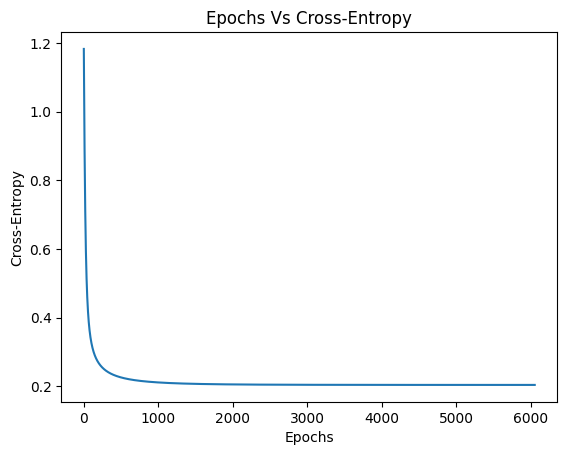

In [ ]:
plt.plot(losses)
plt.title("Epochs Vs Cross-Entropy")
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy")

Se ha realizado la prediccion para el dato [63,55]. Primero se normalizo en base a los datos de entrenamiento y luego se realizo una prediccion en funcion del modelo entrenado. Como se ve, si un alumno tiene esas notas, entonces esta desaprobado segun el modelo entrenado.

In [ ]:
a = np.array([63,55]).reshape(1,2)
a = (a-mu)/sigma
prediction = model.predict(x=a)
w ,b = param
if(prediction > 0.5):
  result = 1
else:
  result = 0
print("parametros:",param)
print("prediccion = ",result, "valor calculado:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
parametros: [array([[3.9546654],
       [3.688248 ]], dtype=float32), array([1.7005886], dtype=float32)]
prediccion =  0 valor calculado: [[-1.0780627]]


Tambien se ha graficado la precision en funcion de las iteraciones, se puede ver que a mas iteraciones, la precision aumenta.

Text(0, 0.5, 'Accuracy [%]')

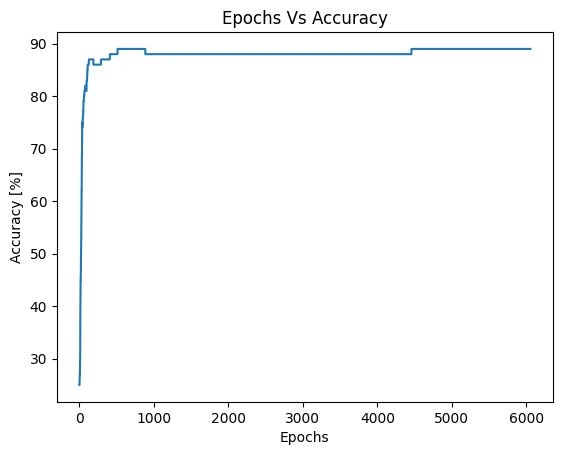

In [ ]:
plt.plot(accuracy*100)
plt.title("Epochs Vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy [%]")

Realizo un grafico con todas las notas del dataset y su respectiva recta de clasificacion. (*Datos normalizados*).

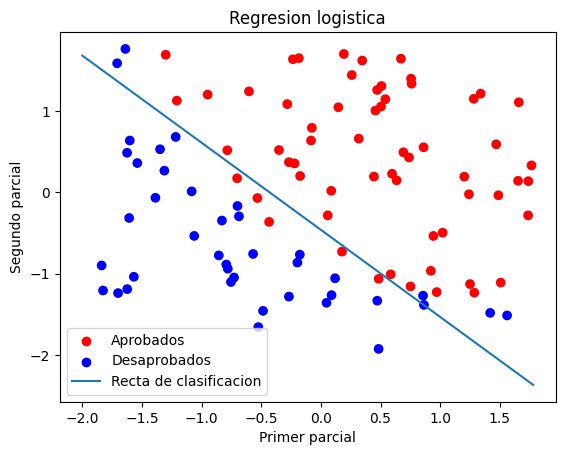

In [ ]:
my_color = np.where(dataset[:,2]>=0.5, 'red', 'blue')
plt.scatter(notas[:,0],notas[:,1], color = my_color)
plt.scatter([], [], color='red', label='Aprobados')
plt.scatter([], [], color='blue', label='Desaprobados')
plt.xlabel("Primer parcial")
plt.ylabel("Segundo parcial")
m = np.linspace(-2,1.78, 1000)
plt.title("Regresion logistica")
plt.plot(m,(-b-w[0]*m)/w[1], label = 'Recta de clasificacion')
plt.legend()

In [ ]:
my_color = np.where(dataset[:,2]>=0.5, 'red', 'blue')
plt.scatter(x[:,0],x[:,1], color = my_color)


# Ejemplo de concentracion de quimicos

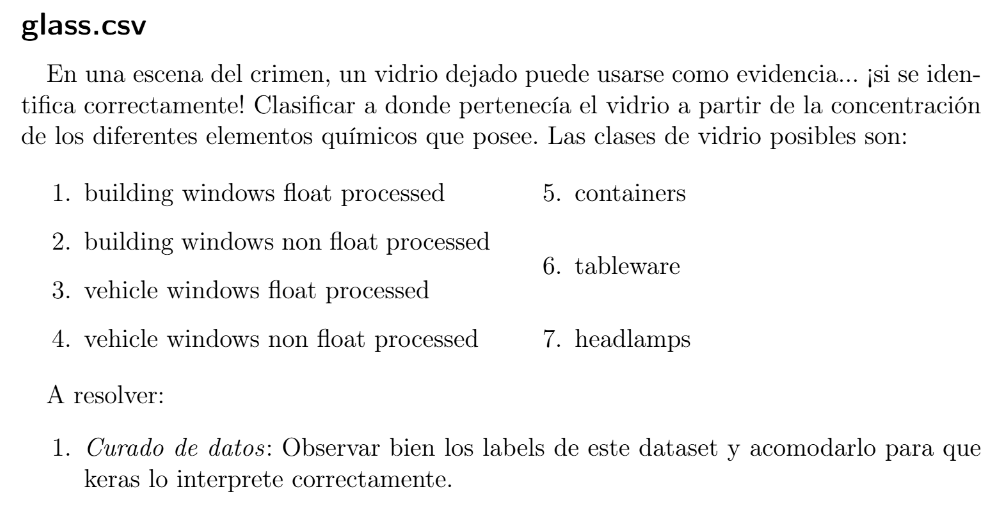

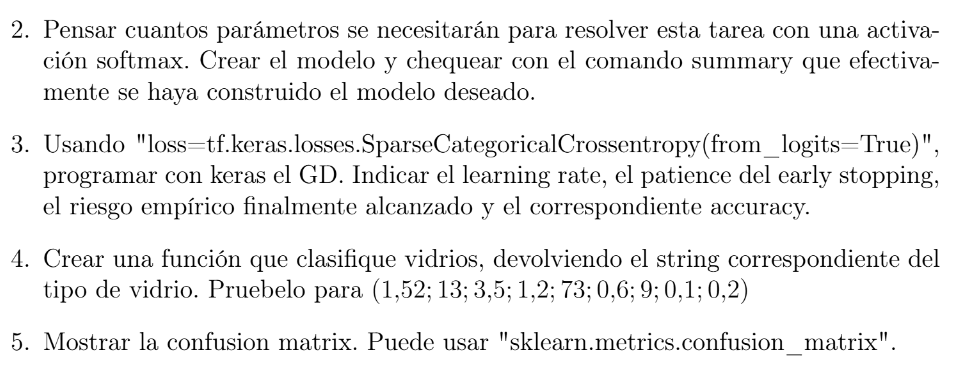

In [ ]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [ ]:
example_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(example_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows = 1)

Creo una funcion para el curado de datos

In [ ]:
def curado(v,k):
  total = np.zeros(np.size(v))
  false_array = np.zeros(np.size(v))
  c = 0
  for i in np.arange(k+1):
    mask = np.where(v == i, True, False)
    #condicion de que todo el array es falso
    if(np.array_equal(mask, false_array)):
      continue
    filtrado = mask*c
    total = total+filtrado
    c = c+1
  return total, c

Obtengo los datos de entrada y los de salida. Luego realizo el *curado* de datos.

In [ ]:
quimicos = np.array(dataset[:,:9]) #tomo las primeras 9 columnas
resultado = np.array(dataset[:,9]) #la ultima columna me determina el resultado
largo = np.size(resultado)
#curacion de datos
resultado, k = curado(resultado, 7)

In [ ]:
#normalizacion de datos
desvio_std = np.std(quimicos,axis=0)
media = np.mean(quimicos,axis=0)
quimicos_norm = (quimicos-media)/desvio_std

Creo un modelo softmax categorico y lo entreno.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(k, input_dim=9))
model.summary()
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3.5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
hist = model.fit(x= quimicos_norm, y= resultado, batch_size = largo, epochs=5000, callbacks=[es])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6)                   │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7336 - loss: 0.5960
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7336 - loss: 0.5959
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7336 - 

Indico *accuracy* y *perdidas*.

In [ ]:
losses = np.array(hist.history['loss'])
param = model.get_weights()
accuracy = np.array(hist.history['accuracy'])
print("Accuracy de:", accuracy[np.size(accuracy)-1])
print("Perdida de:", losses[np.size(losses)-1])

Accuracy de: 0.7289719581604004
Perdida de: 0.5900916457176208


Normalizo el valor de ejemplo en base al dataset de entrenamiento.

In [ ]:
example = np.array([1.52,13,3.5,1.2,73,0.6,9,0.1,0.2])
example_norm = (example-media)/desvio_std
example = example_norm.reshape(1,9)

Realizo la clasificacion en funcion del modelo entrenado.

In [ ]:
def clasificacion(muestra):
  predict = model.predict(x=muestra)
  vidrios = ["Building windows float processed", "Building windows float processed",
             "Vehicle windows float processed", "Containers", "Tableware", "headlamps"]
  tipo = np.argmax(predict)
  return vidrios[tipo]

clasificacion(example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


'Building windows float processed'

Realizo la matriz de confusion para visualizar y evaluar el modelo de clasificacion.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67        70
         1.0       0.67      0.74      0.70        76
         2.0       0.43      0.18      0.25        17
         3.0       0.92      0.85      0.88        13
         4.0       1.00      1.00      1.00         9
         5.0       0.97      1.00      0.98        29

    accuracy                           0.73       214
   macro avg       0.77      0.74      0.75       214
weighted avg       0.72      0.73      0.72       214



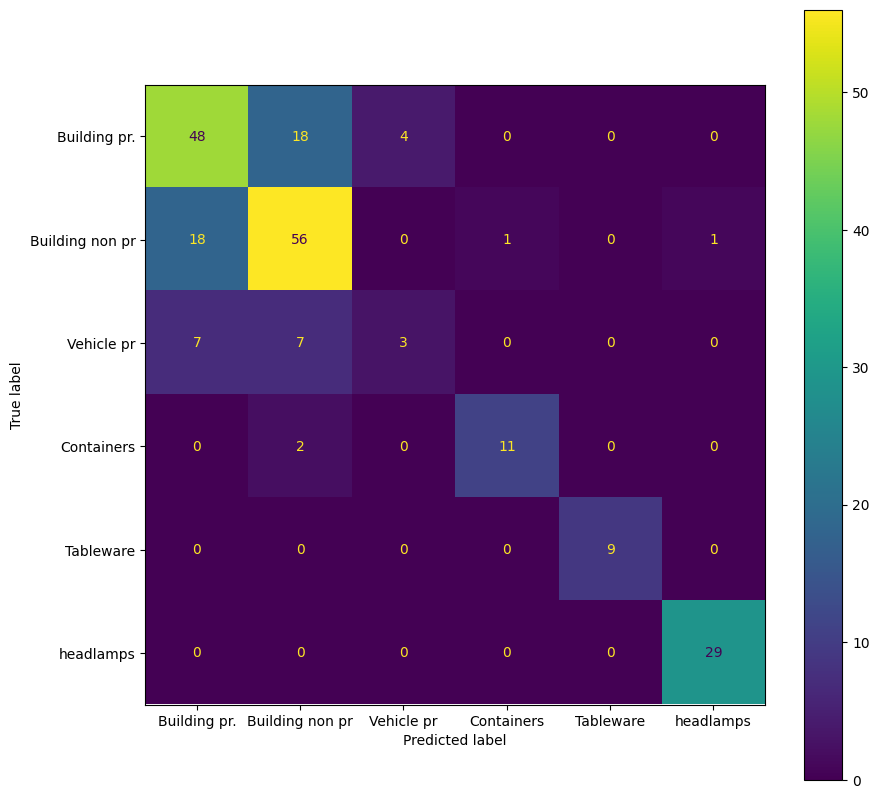

In [ ]:
valores_estimados = model.predict(x = quimicos_norm)
resultados_estimados = []

for i in np.arange(largo):
  resultados_estimados.append(np.argmax(valores_estimados[i]))

def show_results(y_true,y_pred):
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["Building pr.", "Building non pr",
             "Vehicle pr", "Containers", "Tableware", "headlamps"],ax=ax)
  print(classification_report(y_true,y_pred))

show_results(resultado,resultados_estimados)

# Ejemplo de datos medicos

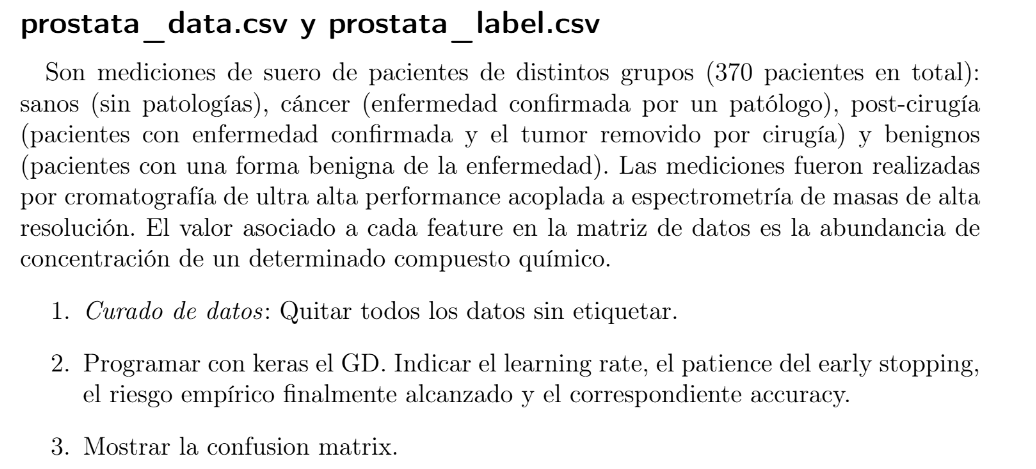

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
import csv
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
#importo datos
data_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
fdata = request.urlopen(data_url)
labels_url = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
labelsdata = request.urlopen(labels_url)

#visualizacion de los datos
data = pd.read_csv(fdata)
labels = pd.read_csv(labelsdata)

In [ ]:
data

,Unnamed: 0,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_295.2266m/z,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n
0,20210420_019,87.019471,40.536483,181.357172,546.869445,45.077911,166.800421,263.926834,115.441345,947.994037,...,60.962114,685.861727,370.328128,435.448570,63.767304,165.116329,1306.746525,76.319880,556.706199,447.573857
1,20210420_021,68.644252,42.535985,172.770981,536.750237,36.602159,153.598451,254.598889,107.942448,904.809333,...,55.846733,703.085938,378.748131,436.822593,60.620782,162.477708,1280.568352,74.833557,559.765555,448.057678
2,20210420_023,85.310770,37.775988,181.641203,547.007455,43.492033,168.435256,245.294072,115.644288,948.623283,...,59.841452,667.091289,369.317188,435.448730,63.080944,165.063880,1306.559848,76.300135,548.904251,435.762433
3,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,86.486659,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910
4,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,85.579748,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,20220523_071,79.516403,38.984035,149.108165,534.700829,44.785520,162.971985,244.980404,112.840824,933.145821,...,68.722755,675.906991,388.633766,493.733872,55.976837,181.047211,1266.112541,77.687264,568.367563,638.791398
615,20220523_073,83.592049,38.067673,151.351200,531.341522,49.598905,155.465703,247.099317,111.615323,925.902524,...,75.247452,677.470028,374.118571,400.053387,66.749691,166.608685,1324.731363,81.640690,576.408286,397.669016
616,20220523_075,83.714187,39.374236,198.587343,567.819251,45.803409,171.089417,265.275403,114.307577,951.727071,...,66.631111,713.554929,387.765677,446.310543,65.403340,164.382350,1319.535904,78.081889,569.346047,458.079079
617,20220523_077,81.278970,43.837626,189.020333,533.190790,32.211350,172.168390,250.841315,117.089493,908.324440,...,58.238231,659.604135,375.140877,455.350762,55.544867,168.144670,1287.154380,75.083862,570.841715,435.165094


In [ ]:
labels

,Unnamed: 0,class
0,20210420_019,NaN
1,20210420_021,NaN
2,20210420_023,NaN
3,20210420_025,healthy
4,20210420_027,healthy
...,...,...
614,20220523_071,NaN
615,20220523_073,NaN
616,20220523_075,NaN
617,20220523_077,NaN


Realizo un curado de datos con Pandas.

In [ ]:
combined = pd.concat([data, labels], axis=1)
curated_data = combined.dropna(subset=['class'])

In [ ]:
curated_data

,Unnamed: 0,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n,Unnamed: 0,class
3,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910,20210420_025,healthy
4,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122,20210420_027,healthy
5,20210420_029,33.124379,1717.149354,171.340081,1002.790531,2.841494,54.081091,21.738453,24.507923,196.245242,...,324.643771,379.044638,27.521154,34.158236,1436.779597,27.398994,510.646098,182.016428,20210420_029,cancer
6,20210420_031,4.290027,0.000000,322.183226,785.579923,0.748938,120.946515,0.000000,11.281027,161.898929,...,72.462262,74.381379,53.015654,7.153705,237.986766,105.797730,82.331384,144.030763,20210420_031,cancer
7,20210420_033,117.150763,29.729792,207.120797,3.819869,43.164301,330.283424,354.812847,314.922104,2326.797182,...,441.929508,558.965544,75.952197,315.557910,1118.011788,99.747356,770.547695,610.577823,20210420_033,post-surgery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,20210714_041,128.657637,14.792831,267.964086,169.738153,94.188310,78.519038,484.717456,262.436808,2124.798749,...,451.861345,740.825392,78.939931,355.188085,1769.057533,156.181719,898.904583,905.048821,20210714_041,benign
570,20210714_043,37.571757,78.857534,291.563408,776.984928,19.824049,578.643696,97.852421,31.363809,290.595738,...,289.436647,233.143895,25.196779,24.539801,817.396836,111.439083,354.222726,205.927172,20210714_043,cancer
571,20210714_045,113.639459,1.428546,89.560830,44.212780,67.772490,73.879011,475.498343,215.320392,1845.722669,...,311.819659,383.661108,60.634778,128.694440,1078.329430,111.931710,447.587060,550.732215,20210714_045,benign
573,20210714_049,100.944997,213.602360,533.707854,472.748158,55.421833,1447.136046,333.709596,168.940726,1377.779121,...,462.516741,666.853661,80.625310,316.973293,1557.357663,157.624910,630.222369,870.856582,20210714_049,benign


Para que la red neuronal pueda interpretar las salidas, se le asigna un valor numerico.

In [ ]:
label_mapping = {
    'healthy': 0,
    'post-surgery': 1,
    'benign': 2,
    'cancer': 3
}

curated_data['class'] = curated_data['class'].replace(label_mapping).infer_objects(copy=False)

<ipython-input-19-73ccc510f0d6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curated_data['class'] = curated_data['class'].replace(label_mapping).infer_objects(copy=False)


In [ ]:
curated_data

,Unnamed: 0,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n,Unnamed: 0,class
3,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910,20210420_025,0
4,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122,20210420_027,0
5,20210420_029,33.124379,1717.149354,171.340081,1002.790531,2.841494,54.081091,21.738453,24.507923,196.245242,...,324.643771,379.044638,27.521154,34.158236,1436.779597,27.398994,510.646098,182.016428,20210420_029,3
6,20210420_031,4.290027,0.000000,322.183226,785.579923,0.748938,120.946515,0.000000,11.281027,161.898929,...,72.462262,74.381379,53.015654,7.153705,237.986766,105.797730,82.331384,144.030763,20210420_031,3
7,20210420_033,117.150763,29.729792,207.120797,3.819869,43.164301,330.283424,354.812847,314.922104,2326.797182,...,441.929508,558.965544,75.952197,315.557910,1118.011788,99.747356,770.547695,610.577823,20210420_033,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,20210714_041,128.657637,14.792831,267.964086,169.738153,94.188310,78.519038,484.717456,262.436808,2124.798749,...,451.861345,740.825392,78.939931,355.188085,1769.057533,156.181719,898.904583,905.048821,20210714_041,2
570,20210714_043,37.571757,78.857534,291.563408,776.984928,19.824049,578.643696,97.852421,31.363809,290.595738,...,289.436647,233.143895,25.196779,24.539801,817.396836,111.439083,354.222726,205.927172,20210714_043,3
571,20210714_045,113.639459,1.428546,89.560830,44.212780,67.772490,73.879011,475.498343,215.320392,1845.722669,...,311.819659,383.661108,60.634778,128.694440,1078.329430,111.931710,447.587060,550.732215,20210714_045,2
573,20210714_049,100.944997,213.602360,533.707854,472.748158,55.421833,1447.136046,333.709596,168.940726,1377.779121,...,462.516741,666.853661,80.625310,316.973293,1557.357663,157.624910,630.222369,870.856582,20210714_049,2


In [ ]:
curated_data['class']

,class
3,0
4,0
5,3
6,3
7,1
...,...
569,2
570,3
571,2
573,2


A los datos curados los estandarizo y entreno un modelo usando como salida una softmax.

In [ ]:
input = curated_data.iloc[:,1:764]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(input)

output = curated_data['class']
#entrenamiento del modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=input.shape[1]))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.summary()


es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
hist = model.fit(x= standardized_data, y= output, batch_size = np.size(output), epochs=5000, callbacks=[es])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 4)                   │           3,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,812 (14.89 KB)

 Trainable params: 3,812 (14.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9154 - loss: 0.3034
Epoch 979/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9205 - loss: 0.3029
Epoch 980/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9205 - loss: 0.3024
Epoch 981/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9205 - loss: 0.3019
Epoch 982/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9205 - loss: 0.3014
Epoch 983/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9205 - loss: 0.3008
Epoch 984/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9205 - loss: 0.3003
Epoch 985/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9205 - loss: 0.2998
Epoch 986/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9205 - loss: 0.2993
Epoch 987/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9205 - loss: 0.2988
Epoch 988/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9205 - loss: 0.29

Indico tanto *accuracy* como riesgo empirico del modelo entrenado.

In [36]:
accuracy = hist.history['accuracy'][-1]
riesgo_empirico = hist.history['loss'][-1]

print(f"Accuracy alcanzado: {accuracy:.4f}")
print(f"Riesgo empírico: {riesgo_empirico:.4f}")

Accuracy alcanzado: 0.9974
Riesgo empírico: 0.0214


Observo el rendimiento del clasificador. Describe casi por completo los datos de entrenamiento.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        34
           2       1.00      0.98      0.99        63
           3       0.99      1.00      1.00       147

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



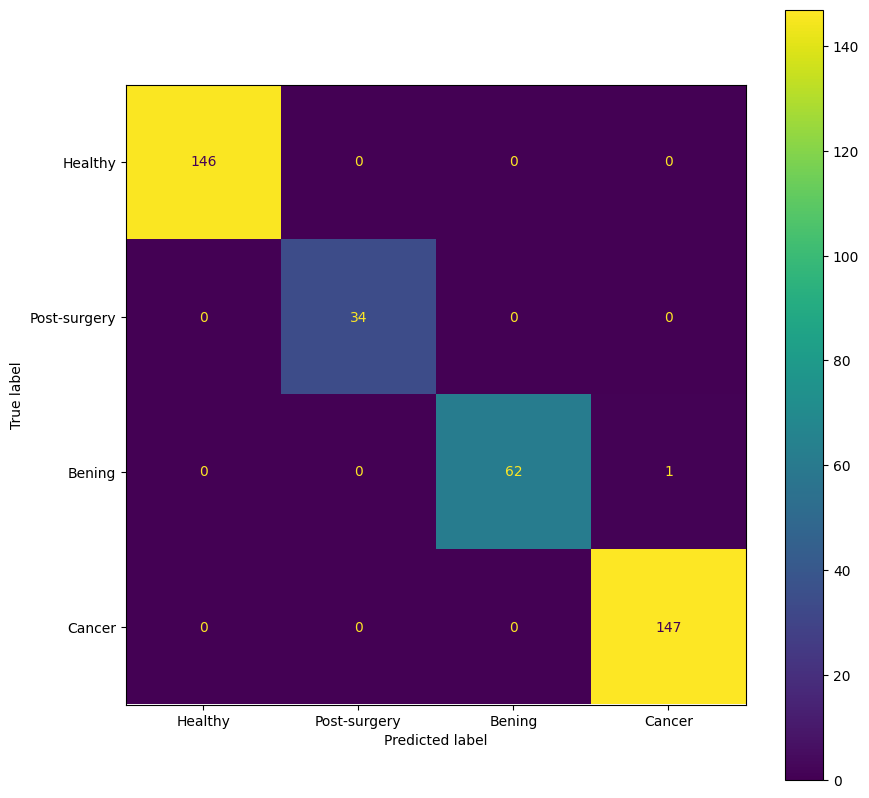

In [ ]:
#confusion matrix
valores_estimados = model.predict(standardized_data)
resultados_estimados = np.argmax(valores_estimados, axis=1)

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["Healthy", "Post-surgery","Bening","Cancer"],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))

show_results(output,resultados_estimados)

# Procesamiento de imagenes

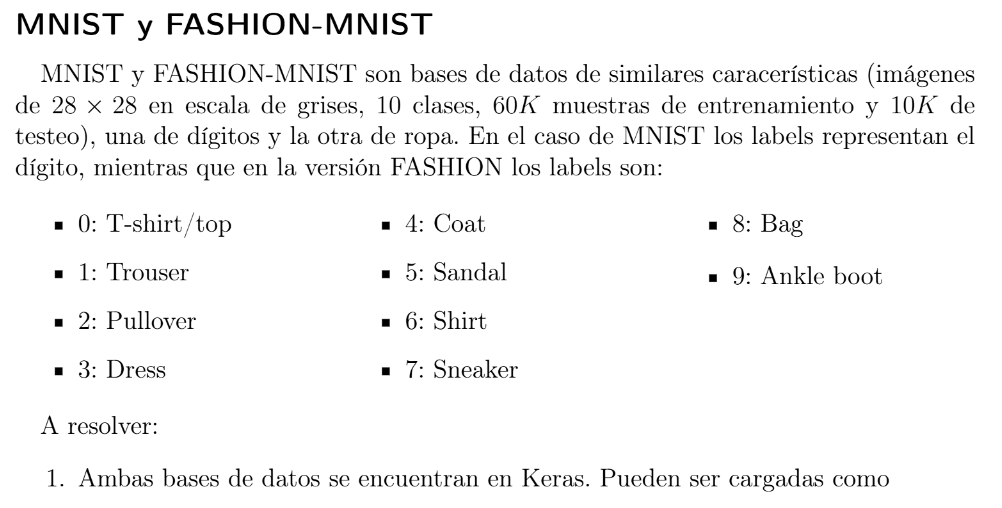

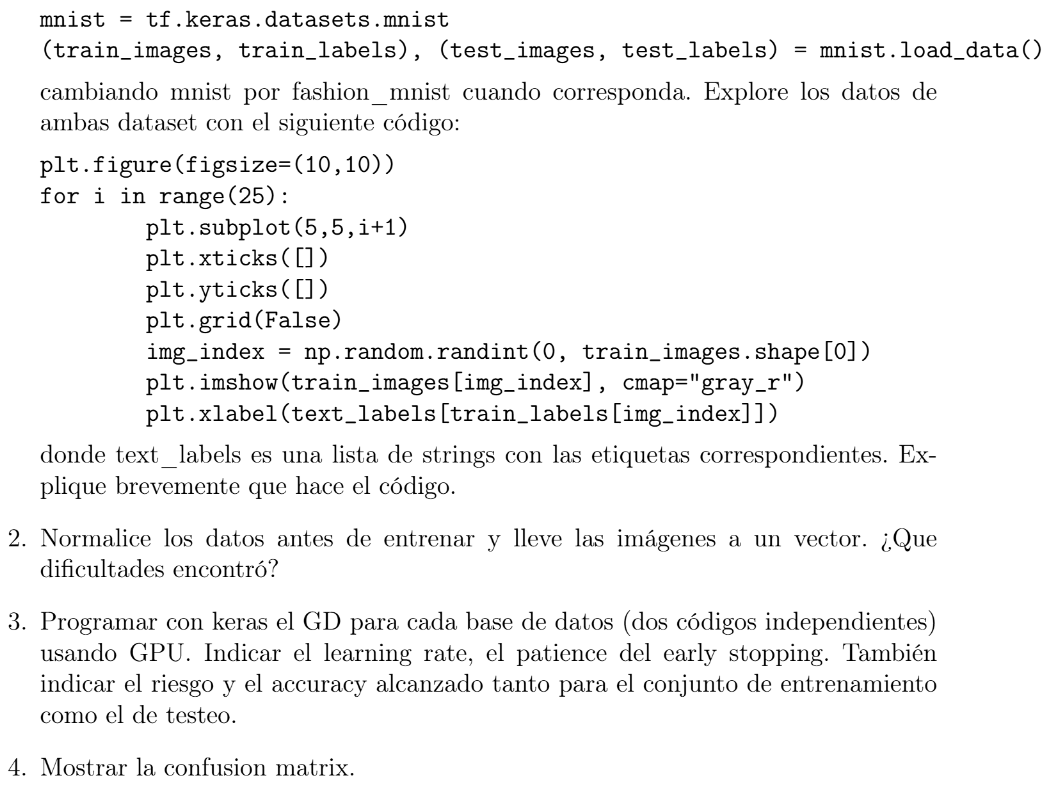

In [49]:
import tensorflow as tf
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_fashion_mnist, train_labels_fashion_mnist), (test_fashion_mnist,test_labels_fashion_mnist) = fashion_mnist.load_data()
largo_fashion_mnist, largo_fashion, alto_fashion = train_fashion_mnist.shape

In [6]:
mnist = tf.keras.datasets.mnist
(train_mnist, train_labels_mnist), (test_mnist, test_labels_mnist) = mnist.load_data()
largo_mnist, largo_numeros, alto_numeros = train_mnist.shape

In [15]:
type(train_labels_mnist)

numpy.ndarray

In [19]:
numeros_labels = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']
ropa_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
array_texto_mnist = np.vectorize(lambda x: numeros_labels[x])(train_labels_mnist)
array_texto_fashion_mnist = np.vectorize(lambda x: ropa_labels[x])(train_labels_fashion_mnist)

 función llamada *show_examples* muestra ejemplos aleatorios de imágenes y sus etiquetas correspondientes en un conjunto de datos.

In [10]:
def show_examples(train_images, text_labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_index = np.random.randint(0, train_images.shape[0])
    plt.imshow(train_images[img_index], cmap="gray_r")
    plt.xlabel(text_labels[img_index])

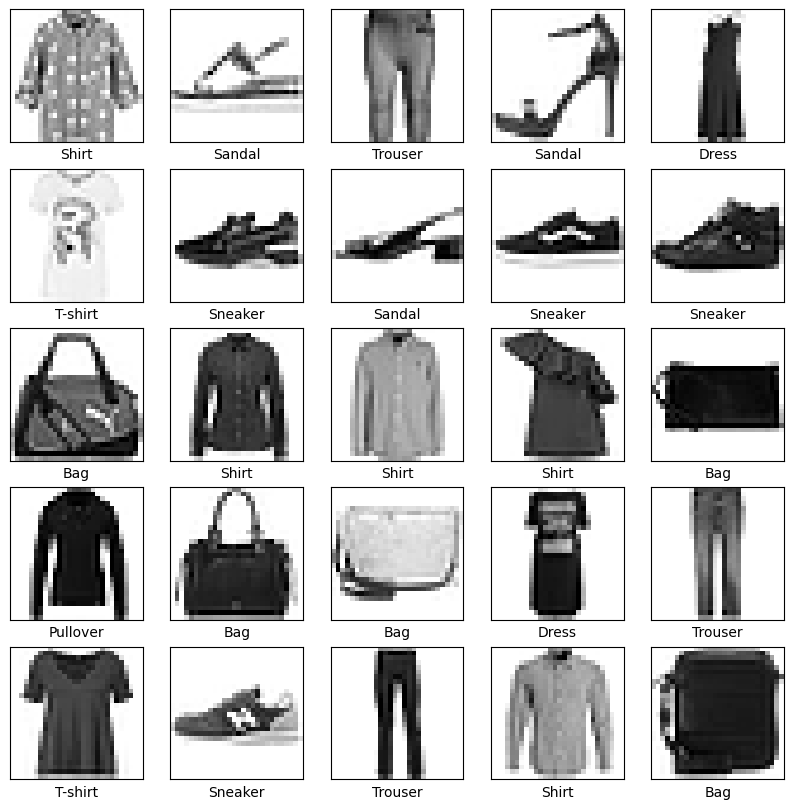

In [20]:
show_examples(train_fashion_mnist, array_texto_fashion_mnist)

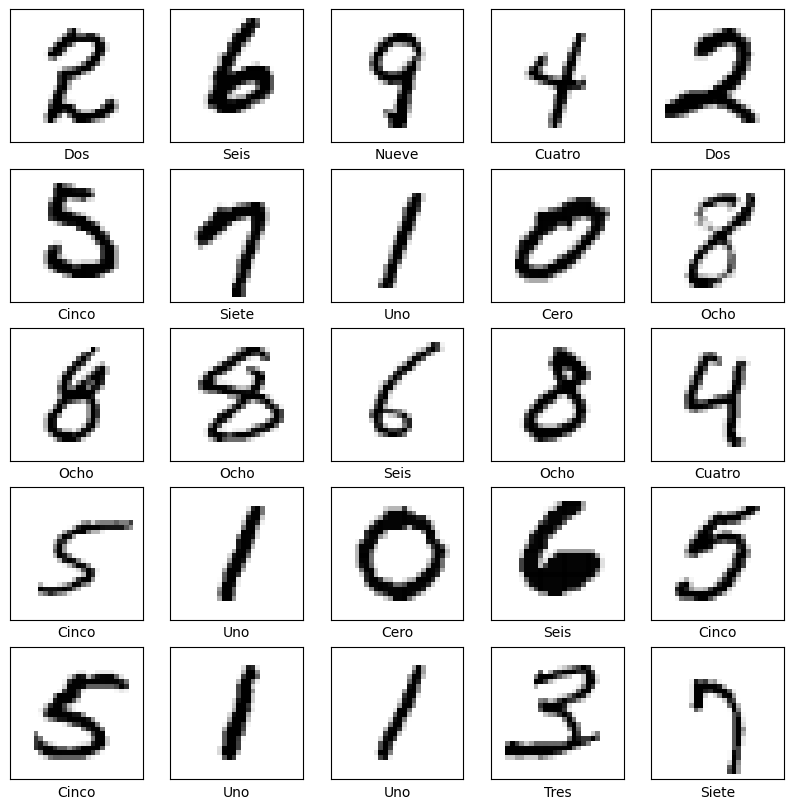

In [21]:
show_examples(train_mnist, array_texto_mnist)

La dificultad de cada dato es que hay muchos pixeles con una varianza igual a cero dando una alta redundancia que inecesaria al momento de entrenar los modelos de redes neuronales. Por lo que es necesario eliminar esos pixeles que tienen mucha redundancia

In [44]:
def eliminar_pixeles_varianza_cero(imagenes):
    num_imagenes, alto, ancho = imagenes.shape
    imagenes_reshaped = imagenes.reshape(num_imagenes, alto * ancho)

    varianza_pixeles = np.var(imagenes_reshaped, axis=0)
    indices_validos = np.where(varianza_pixeles != 0)[0]
    indices_eliminados = np.where(varianza_pixeles == 0)[0]

    imagenes_filtradas = np.delete(imagenes_reshaped, indices_eliminados, axis=1)
    return imagenes_filtradas, indices_eliminados

In [51]:
imagenes_filtradas_fashion, indices_eliminados_fashion = eliminar_pixeles_varianza_cero(train_fashion_mnist)
imagenes_filtradas_mnist, indices_eliminados_mnist = eliminar_pixeles_varianza_cero(train_mnist)

Normalizo los datos en funcion de los datos de entrenamiento.

In [52]:
scaler_fashion = StandardScaler()
scaler_mnist = StandardScaler()

scaler_fashion.fit(imagenes_filtradas_fashion)
imagenes_filtradas_fashion = scaler_fashion.transform(imagenes_filtradas_fashion)
scaler_mnist.fit(imagenes_filtradas_mnist)
imagenes_filtradas_mnist = scaler_mnist.transform(imagenes_filtradas_mnist)

In [58]:
model_fashion = tf.keras.Sequential()
model_fashion.add(tf.keras.layers.Dense(10, input_dim=imagenes_filtradas_fashion.shape[1]))
model_fashion.add(tf.keras.layers.Dense(16, activation='relu'))
model_fashion.add(tf.keras.layers.Dense(32, activation='relu'))
model_fashion.add(tf.keras.layers.Dense(16, activation='relu'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))
model_fashion.summary()

es_fashion = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model_fashion.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
hist_fashion = model_fashion.fit(x= imagenes_filtradas_fashion, y= train_labels_fashion_mnist, batch_size = largo, epochs=2000, callbacks=[es_fashion])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,268 (36.20 KB)

 Trainable params: 9,268 (36.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1094 - loss: 2.4202
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1101 - loss: 2.4093
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.1111 - loss: 2.3992
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.1118 - loss: 2.3898
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.1127 - loss: 2.3808
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.1137 - loss: 2.3723
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.1151 - loss: 2.3641
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1163 - loss: 2.3562
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.1177 - loss: 2.3486
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.1191 - loss: 2.3412
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.1208 - loss: 2.3339
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.1228

In [63]:
model_mnist = tf.keras.Sequential()
model_mnist.add(tf.keras.layers.Dense(10, input_dim=imagenes_filtradas_mnist.shape[1]))
model_mnist.add(tf.keras.layers.Dense(16, activation='relu'))
model_mnist.add(tf.keras.layers.Dense(32, activation='relu'))
model_mnist.add(tf.keras.layers.Dense(16, activation='relu'))
model_mnist.add(tf.keras.layers.Dense(10, activation='softmax'))
model_mnist.summary()

es_mnist = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model_mnist.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
hist_mnist = model_mnist.fit(x=imagenes_filtradas_mnist, y=train_labels_mnist, batch_size=imagenes_filtradas_mnist.shape[0], epochs=2000, callbacks=[es_mnist])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 10)                  │           7,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,598 (33.59 KB)

 Trainable params: 8,598 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1268 - loss: 2.3252
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step - accuracy: 0.1273 - loss: 2.3230
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.1279 - loss: 2.3209
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.1288 - loss: 2.3189
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.1297 - loss: 2.3168
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.1303 - loss: 2.3149
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1310 - loss: 2.3129
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.1317 - loss: 2.3110
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1323 - loss: 2.3091
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.1329 - loss: 2.3072
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.1339 - loss: 2.3054
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1

In [62]:
imagenes_filtradas_mnist.shape[0]

60000

Elimino los pixeles redundantes en el set de testeo y normalizo los datos de testeo en funcion de los datos de entrenamiento.

In [59]:
test_fashion_mnist = test_fashion_mnist.reshape(test_fashion_mnist.shape[0], -1)
test_mnist = test_mnist.reshape(test_mnist.shape[0], -1)

imagenes_filtradas_fashion_test = np.delete(test_fashion_mnist, indices_eliminados_fashion, axis=1)
imagenes_filtradas_fashion_test = scaler_fashion.transform(imagenes_filtradas_fashion_test)

imagenes_filtradas_mnist_test = np.delete(test_mnist, indices_eliminados_mnist, axis=1)
imagenes_filtradas_mnist_test = scaler_mnist.transform(imagenes_filtradas_mnist_test)

Testeo los clasificadores. Se puede ver que aun presenta errores, estos se puede mejorar utilizando otro tipo modelo o *customizarlo* un poco mas.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1000
           1       0.97      0.95      0.96      1000
           2       0.71      0.69      0.70      1000
           3       0.81      0.87      0.84      1000
           4       0.71      0.76      0.73      1000
           5       0.92      0.90      0.91      1000
           6       0.57      0.46      0.51      1000
           7       0.89      0.91      0.90      1000
           8       0.93      0.94      0.93      1000
           9       0.91      0.92      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



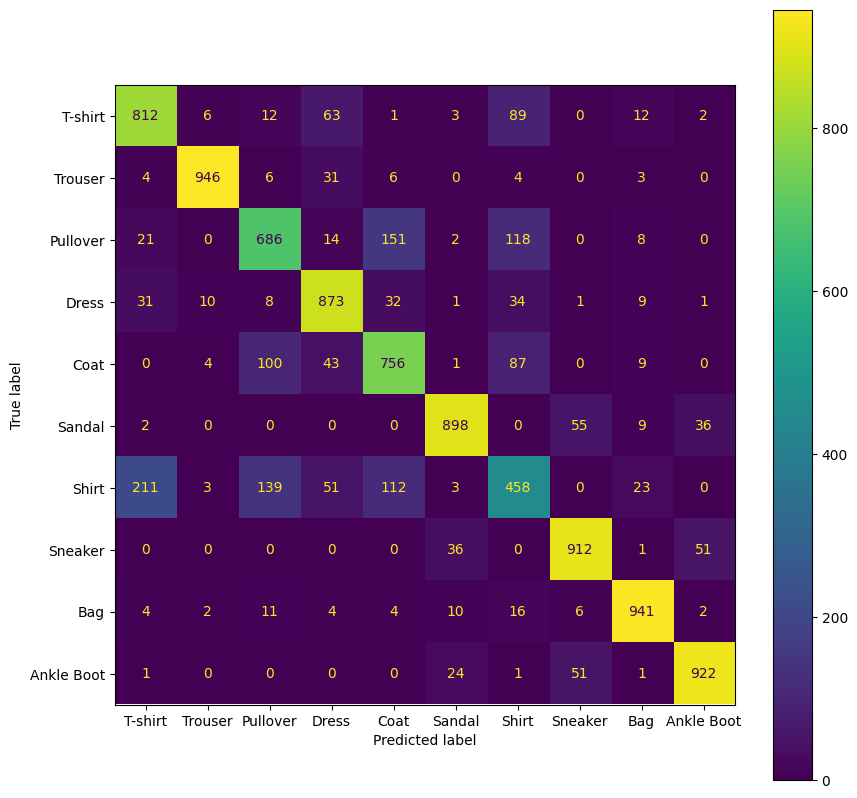

In [67]:
#confusion matrix
valores_estimados = model_fashion.predict(imagenes_filtradas_fashion_test)
resultados_estimados = np.argmax(valores_estimados, axis=1)

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                                display_labels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'],
                                                ax=ax)
  print(classification_report(y_true, y_pred))

show_results(test_labels_fashion_mnist, resultados_estimados)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.93      0.98      0.95      1135
           2       0.90      0.86      0.88      1032
           3       0.84      0.85      0.84      1010
           4       0.88      0.91      0.90       982
           5       0.81      0.80      0.80       892
           6       0.90      0.93      0.91       958
           7       0.88      0.88      0.88      1028
           8       0.87      0.81      0.84       974
           9       0.87      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



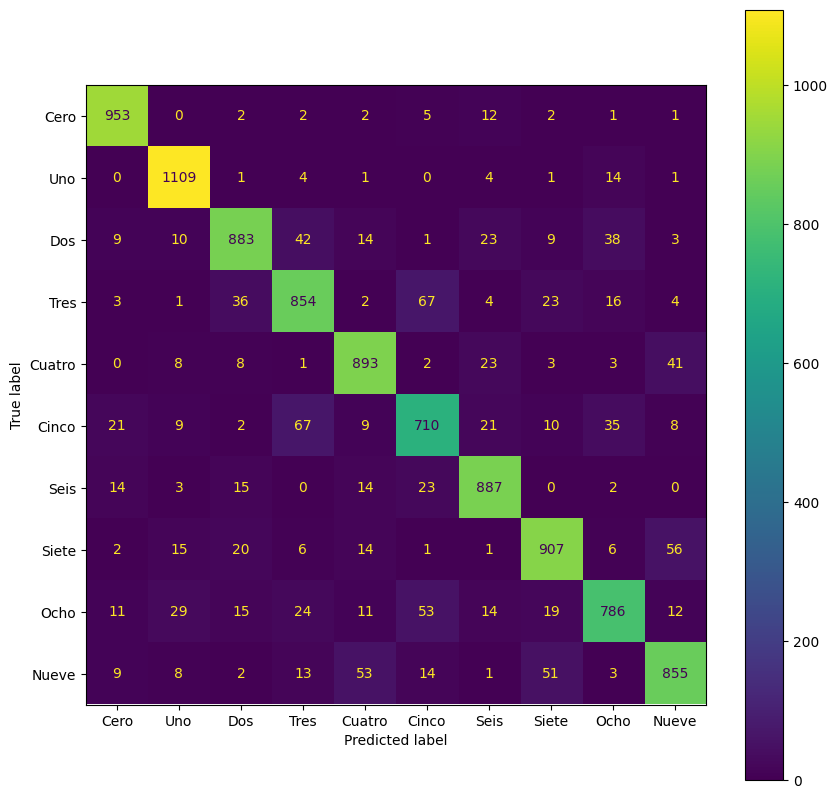

In [68]:
valores_estimados = model_mnist.predict(imagenes_filtradas_mnist_test)
resultados_estimados = np.argmax(valores_estimados, axis=1)

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                                display_labels=['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve'],ax=ax)
  print(classification_report(y_true, y_pred))

show_results(test_labels_mnist, resultados_estimados)